<h1><strong><center>CS985: Machine Learning for Data Analytics </center></strong></h1>
<h3><strong><center>Diego Green 201986869  -  Godspower Ogaga Uti 201956584  -  John Reid 201992904  -  Adem Arslan 201990657</center></strong></h3>
<h3><strong><center>Team: Group M</center></strong></h3>

<h1><strong><center>University of Strathclyde</center></strong></h1>

<a id='Index'></a>
<h1>Table of content:</h1>
<font color = 'white' size="2"> .</font>
<font size="4">
    <ul>    
        <li><a href='#Int'>Introduction</a></li>
        <li><a href='#Key'>Key challenges</a></li>
        <li><a href='#Architecture'>Final Architecture</a></li>
        <li><a href='#Environment'>Environment and Packages</a></li>
        <li><a href='#GA'>Dataset Summary, Analysis and Cleaning</a></li>
        <ul><li><a href='#Summary'>General Summary</a></li>
            <li><a href='#DataTrat'>Data Cleaning and Visualization</a></li></ul>
        <li><a href='#Implementation'>Implementation</a></li>
        <ul><li><a href='#Baseline'>Model Baseline</a></li>
            <li><a href='#Ensambled'>Final Model Implementation</a></li>
            <li><a href='#EnsVal'>Final Model Validation</a></li></ul>
        <li><a href='#Prediction'>Model Predictions</a></li>
        <li><a href='#Conclusion'>Reflections and Conclusion</a></li>
        <li><a href='#PromModel'>Promising Models And Techniques Which Failed</a></li>
        <ul><li><a href='#Adaboosting'>Adaboosting and Voting</a></li>
            <li><a href='#AdaboostingBaggingModel'>Adaboosting Bagging Model</a></li></ul></ul>
</font>         

<a id='Int'></a>
<h1>Introduction</h1>

Spotify Technology S.A. is an international audio streaming service provider founded in April 2006 which in late 2008 launched the well-known app Spotify. Since the app was launched, the company went on to become a juggernaut in the music streaming industry. It's because of this that nowadays, Spotify contains a plethora of different artists from every generation and the songs that accompany the acclaimed names, providing over 50 million tracks and podcast for free to its 271 million montly users (including 124 million subscribers). [(February, 2020) - Newsroom.spotify.com](https://newsroom.spotify.com/2020-02-05/spotify-reports-fourth-quarter-and-full-year-2019-earnings)

![title](https://developer.spotify.com/assets/branding-guidelines/logo@2x.png)
<a href='#Index'>Back to index</a>

<a id='Key'></a>
<h1>Key Challenges</h1>

The main task is to predict the popularity score of a song based on other attributes of the dataset. Determining this will be done by using different supervised learning techniques. The dataset that will be used in this task is a custom subset of the data set available in: [Spotify Past Decades Songs Attributes](https://www.kaggle.com/cnic92/spotify-past-decades-songs-50s10s), which includes approximately 450 songs released from 1950 to 2019.
The main challenge of this task is to create a high performance-accurate machine learning model which is able to correctly  predict the song's popularity by the analysis of its attributes:
<ul><li>Genre</li>
    <li>Title</li>
    <li>Artist - Band</li>
    <li>Release year</li>
    <li>Beats per minutes</li>
    <li>Energy</li>
    <li>Danceability</li>
    <li>Loudness</li>
    <li>Liveness</li>
    <li>Balance</li>
    <li>Duration</li>
    <li>Acousticness</li>
    <li>Speechiness</li>
    <li>Popularity (Target)</li></ul>

<div style="text-align: justify">The first part of this notebook covers the exploration of the variables and attributes of the dataset. Furthermore, it gives a descriptive analysis of the variables.</div>
<div style="text-align: justify">The second part of this notebook will aim at creating different predictive models.</div>
<div style="text-align: justify">The final part covers the evaluation of the various models and the conclusion.</div> 

<a href='#Index'>Back to index</a>

<a id='Architecture'></a>
<h1>Final Architecture</h1>

<div style="text-align: justify">The final machine learning model created for this task is an ensemble (stacking) model which its base estimator is composed of three different weak learners (Lasso Regressor, KneighborsRegressor, and a SupportVectorM. Regressor), combined with a RandomForestRegressor (a strong ensemble learner).</div>


<div style="text-align: justify">Regarding the final estimator, we decided to use a LinearRegression model because we noticed that its cross-validation score was the best and most stable within the final estimators tested.
Each of the base estimators has its hyperparameters optimized throughout a GridSearch based on RMSE score.</div>



<div style="text-align: justify">The reasons why these models were selected and how its parameters were configured is explained through the report.</div>

<a href='#Index'>Back to index</a>

<a id='Environment'></a>
<h1>Environment and Packages</h1>

<ul><li>Python version: Python 3.7
<li>Jupyter Notebook Version: 6.0.0
<li>Anaconda Navigator Version: 1.9.7
<li>Packages used:
<ul><li>Sys</li>
    <li>Pandas: Data Analysis and Manipulation tool - Open source Python Data Analysis Library</li>
    <li>Seaborn: Main Plotting tool</li>
    <li>Matplotlib.pyplot: Plotting tool</li>
    <li>Numpy: Used for data manipulation</li>
    <li>scipy.stats: Statistical functions</li>
    <li>statsmodels.graphics.api</li>
    <li>Sklearn: machine learning library </li>
    <ul><li>base.clone</li>
        <li>preprocessing.MinMaxScaler</li>
        <li>preprocessing.OneHotEncoder</li>
        <li>preprocessing.PowerTransformer</li>
        <li>model_selection.GridSearchCV</li>
        <li>model_selection.KFold</li>
        <li>model_selection.cross_validate</li>
        <li>pipeline.Pipeline</li>
        <li>pipeline.FeatureUnion</li>
        <li>base.BaseEstimator</li>
        <li>base.TransformerMixin</li>
        <li>metrics.mean_absolute_error</li>
        <li>metrics.r2_score</li>
        <li>metrics.mean_squared_error</li>
        <li>impute.SimpleImputer</li>
        <li>linear_model.Lasso</li>
        <li>linear_model.LassoCV</li>
        <li>linear_model.LinearRegression</li>
        <li>neighbors.KNeighborsRegressor</li>
        <li>svm.SVR</li>
        <li>ensemble.RandomForestRegressor</li>
        <li>ensemble.VotingRegressor</li>
        <li>ensemble.StackingRegressor</li></ul></ul>

Explanation of why there package are needed / used can be found within the code before using them.



In [1]:
# Code is compatible with Python 3.X
import warnings
import sys
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
from scipy import stats
import statsmodels.graphics.api as smg
import statsmodels.api as sm
from sklearn.base import clone 
from sklearn import metrics
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.pipeline import FeatureUnion
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.svm import SVR
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import VotingRegressor 
from sklearn.ensemble import VotingRegressor
from sklearn.ensemble import StackingRegressor
sb.set_style("whitegrid")
warnings.filterwarnings("ignore")
print("Running Panda Version:"+pd.__version__)
print("Running Python {0}.{1}".format(sys.version_info[:2][0],sys.version_info[:2][1]))

Running Panda Version:0.25.1
Running Python 3.7


<a href='#Index'>Back to index</a>

<a id='GA'></a>
<h1>Dataset Summary, Analysis and Cleaning</h1>


<a id='Summary'></a>
<h2>General Summary</h2>

<h3> Load dataset </h3>

In [2]:
#Load datasets
Train = pd.read_csv('CS98XRegressionTrain.csv',na_values=['NA'])# making data frame from csv file(Train dataset) 
Train = Train.set_index('Id')#set the Id column as the index
Test = pd.read_csv('CS98XRegressionTest.csv')# making data frame from csv file(Test dataset) 
Test=Test.set_index('Id')#set the Id column as the index

First of all, an insight of both datasets are performed in order to obtain some basic information such as dimensions, features, datatypes and descriptive statistics of the dataset.

#### Dataset's shapes

In [3]:
print(f'Train dataset has {Train.shape[0]} rows and {Train.shape[1]} columns.')
print(f'Test dataset has {Test.shape[0]} rows and {Test.shape[1]} columns.')

Train dataset has 453 rows and 14 columns.
Test dataset has 114 rows and 13 columns.


#### Dataset's columns

In [4]:
print('Train Dataset columns: \n',Train.columns.values,'\n')
print('Test Dataset columns: \n',Test.columns.values)

Train Dataset columns: 
 ['title' 'artist' 'top genre' 'year' 'bpm' 'nrgy' 'dnce' 'dB' 'live' 'val'
 'dur' 'acous' 'spch' 'pop'] 

Test Dataset columns: 
 ['title' 'artist' 'top genre' 'year' 'bpm' 'nrgy' 'dnce' 'dB' 'live' 'val'
 'dur' 'acous' 'spch']


In [7]:
for key, value in Train.iteritems(): #Categorical columns
        if value.dtypes == object:
            print(key)

title
artist
top genre


#### Dataset's random rows

In [5]:
Train.sample(5)

,title,artist,top genre,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
Id,,,,,,,,,,,,,,
66,Pony,Ginuwine,dance pop,1999,142,61,75,-9,12,97,252,0,9,72
205,American Boy,Estelle,r&b,2008,118,73,73,-3,7,51,285,17,33,79
368,Ain't Got No Home,"Clarence ""Frogman"" Henry",louisiana blues,2013,84,33,66,-16,9,53,143,69,9,36
255,I Know What You Want (feat. Flipmode Squad),Busta Rhymes,east coast hip hop,2002,86,75,56,-4,64,49,324,1,32,56
102,Hurts So Good,John Mellencamp,album rock,1982,125,74,79,-5,11,97,219,4,4,69


In [6]:
Test.sample(5)

,title,artist,top genre,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch
Id,,,,,,,,,,,,,
535,I'm Still Standing,Elton John,glam rock,1983,177,90,50,-7,14,77,183,36,18
478,Ringo,Lorne Greene,cowboy western,1964,111,52,56,-13,22,65,214,86,31
473,Right Round,Flo Rida,dance pop,2009,125,67,72,-7,23,71,205,1,6
518,Numb / Encore,JAY-Z,east coast hip hop,2004,107,80,69,-4,55,80,205,6,16
548,One More Night - 2016 Remaster,Phil Collins,mellow gold,1985,136,44,53,-9,10,34,289,79,3


#### Dataset's features types

In [7]:
print('Train Dataset Features types:')
Train.info()#quick description of the data

Train Dataset Features types:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 453 entries, 1 to 453
Data columns (total 14 columns):
title        453 non-null object
artist       453 non-null object
top genre    438 non-null object
year         453 non-null int64
bpm          453 non-null int64
nrgy         453 non-null int64
dnce         453 non-null int64
dB           453 non-null int64
live         453 non-null int64
val          453 non-null int64
dur          453 non-null int64
acous        453 non-null int64
spch         453 non-null int64
pop          453 non-null int64
dtypes: int64(11), object(3)
memory usage: 53.1+ KB


In [8]:
print('Test Dataset Features types:')
Test.info()#quick description of the data

Test Dataset Features types:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 114 entries, 454 to 567
Data columns (total 13 columns):
title        114 non-null object
artist       114 non-null object
top genre    113 non-null object
year         114 non-null int64
bpm          114 non-null int64
nrgy         114 non-null int64
dnce         114 non-null int64
dB           114 non-null int64
live         114 non-null int64
val          114 non-null int64
dur          114 non-null int64
acous        114 non-null int64
spch         114 non-null int64
dtypes: int64(10), object(3)
memory usage: 12.5+ KB


####  Some Descriptive Statistic for both dataset

In [9]:
print('Descriptive Statistics for categorical features on Train Dataset')
Train.describe(include=np.object)

Descriptive Statistics for categorical features on Train Dataset


,title,artist,top genre
count,453,453,438
unique,451,345,86
top,Take Good Care Of My Baby - 1990 Remastered,Elton John,adult standards
freq,2,9,68


In [10]:
print('Descriptive Statistics for numerical features on Train Dataset')
Train.describe()

Descriptive Statistics for numerical features on Train Dataset


,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
count,453.000000,453.000000,453.000000,453.000000,453.000000,453.000000,453.000000,453.000000,453.000000,453.000000,453.000000
mean,1991.443709,118.399558,60.070640,59.565121,-8.836645,17.757174,59.465784,226.278146,32.982340,5.660044,60.743929
std,16.776103,25.238713,22.205284,15.484458,3.577187,13.830300,24.539868,63.770380,29.530015,5.550581,13.470083
min,1948.000000,62.000000,7.000000,18.000000,-24.000000,2.000000,6.000000,98.000000,0.000000,2.000000,26.000000
25%,1976.000000,100.000000,43.000000,49.000000,-11.000000,9.000000,42.000000,181.000000,7.000000,3.000000,53.000000
50%,1994.000000,119.000000,63.000000,61.000000,-8.000000,13.000000,61.000000,223.000000,24.000000,4.000000,63.000000
75%,2007.000000,133.000000,78.000000,70.000000,-6.000000,23.000000,80.000000,262.000000,58.000000,6.000000,71.000000
max,2019.000000,199.000000,100.000000,96.000000,-1.000000,93.000000,99.000000,511.000000,100.000000,47.000000,84.000000


In [11]:
print('Descriptive Statistics for categorical features on Test Dataset')
Test.describe(include=np.object)

Descriptive Statistics for categorical features on Test Dataset


,title,artist,top genre
count,114,114,113
unique,114,101,39
top,"Evergreen (Love Theme from, ""A Star Is Born"")",Queen,adult standards
freq,1,4,25


In [12]:
print('Descriptive Statistics for numerical features on Test Dataset')
Test.describe()

Descriptive Statistics for numerical features on Test Dataset


,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch
count,114.000000,114.000000,114.000000,114.000000,114.000000,114.000000,114.000000,114.000000,114.000000,114.000000
mean,1990.596491,122.342105,60.877193,58.921053,-8.964912,20.131579,58.368421,227.973684,31.078947,6.263158
std,16.545844,26.322650,22.950173,15.022782,3.957584,16.786801,24.286368,63.482345,29.963738,6.594517
min,1945.000000,64.000000,6.000000,26.000000,-22.000000,2.000000,11.000000,112.000000,0.000000,3.000000
25%,1978.250000,106.000000,44.000000,50.250000,-11.750000,10.000000,36.750000,184.250000,5.250000,3.000000
50%,1991.000000,120.000000,59.500000,57.500000,-8.000000,14.000000,61.500000,215.500000,19.500000,4.000000
75%,2005.750000,136.750000,80.000000,69.000000,-6.000000,24.000000,79.750000,264.000000,50.250000,6.000000
max,2019.000000,191.000000,98.000000,94.000000,-1.000000,90.000000,98.000000,444.000000,97.000000,47.000000


<a href='#Index'>Back to index</a>

<a id='DataTrat'></a>
<h2>Data Cleaning, Preprocessing and Visualization</h2>

<div style="text-align: justify">In the descriptive statistics for categorical features on the Train Dataset we realize that there are two songs with the same title. Although it has the same title, maybe the songs are different (or the artist is different), meaning they are different songs.
A search for duplicates and missing values is performed in order to clean the data as a preprocessing step.</div>

In [13]:
print('Train Dataset contains Duplicated rows? ',Train.duplicated().any())
print('Train Dataset contains Missing values?\n',Train.isnull().sum())
print('Test Dataset contains Missing values? :', Test.isnull().any().any())
print('We dont check for Duplicated rows in test dataset becase we if there are, we should predict both of them')

Train Dataset contains Duplicated rows?  True
Train Dataset contains Missing values?
 title         0
artist        0
top genre    15
year          0
bpm           0
nrgy          0
dnce          0
dB            0
live          0
val           0
dur           0
acous         0
spch          0
pop           0
dtype: int64
Test Dataset contains Missing values? : True
We dont check for Duplicated rows in test dataset becase we if there are, we should predict both of them


In [14]:
empty_train =Train[Train.isnull().any(axis=1)]#Rows with missing data
empty_train

,title,artist,top genre,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
Id,,,,,,,,,,,,,,
2,Unchained Melody,The Teddy Bears,NaN,2011,114,44,53,-8,13,47,139,49,3,37
9,Someone Elses Roses,Joan Regan,NaN,2019,100,14,29,-10,15,32,143,89,3,34
27,Drinks On The House,Green Martini Keys,NaN,2016,97,16,57,-16,11,15,181,100,5,28
73,Pachuko Hop,Ike Carpenter Orchestra,NaN,2006,83,53,48,-9,34,80,135,59,3,28
91,Little Things Means A Lot,Jayne Mansfield,NaN,2008,109,29,70,-15,16,63,172,36,4,29
99,The Lady Is A Tramp,Mel Torme & the Mel-Tones,NaN,2016,138,60,41,-8,41,54,170,81,6,40
221,If I Give My Heart To You,The Teddy Bears,NaN,2011,113,29,49,-10,12,29,118,86,3,40
253,Happy Days And Lonely Nights,Suzi Miller And Johnson Brothers,NaN,2012,142,38,65,-8,13,69,146,43,3,27
266,Stairway Of Love,Terry Dene,NaN,2015,93,62,62,-7,25,86,120,55,4,27


In [15]:
empty_data_test=Test[Test.isnull().any(axis=1)]#Rows with missing data
empty_data_test

,title,artist,top genre,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch
Id,,,,,,,,,,,,,
520,We Are The World,U.S.A. For Africa,NaN,1985,73,45,53,-15,7,29,427,19,4


<div style="text-align: justify">The train dataset contains 15 rows of missing categorical data, while the test dataset contains just one row of missing data. Since the column "top genre" is categorical, we are left with a few options; filling it with a random genre name from the list of the genre in the dataset, ignore them or drop the missing entries. Filling 15 rows with one of the top genre names; add bias to the predicting model, while ignoring them creates problems for the learning algorithm. So we have decided to remove the missing entries(15 rows) for the train dataset and fill the test dataset with a random name.</div>

In [16]:
imputer = SimpleImputer(missing_values=np.nan,strategy='constant', fill_value='mygenre')#fill one missing cat-value with mygenre
Test=pd.DataFrame(imputer.fit_transform(Test),columns=Test.columns,index=Test.index)
Test[Test['top genre'] == 'mygenre']#output from the filled column

,title,artist,top genre,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch
Id,,,,,,,,,,,,,
520,We Are The World,U.S.A. For Africa,mygenre,1985,73,45,53,-15,7,29,427,19,4


In [17]:
Train.drop_duplicates(inplace = True)
Train.dropna(inplace = True)
Train.shape# New shape of the train dataset

(437, 14)

In [18]:
Train.nunique()#total number of unique observations over the index axis

title        436
artist       331
top genre     86
year          64
bpm          107
nrgy          90
dnce          76
dB            21
live          58
val           94
dur          198
acous         94
spch          28
pop           56
dtype: int64

<div style="text-align: justify">Analyzing the data obtained from the descriptive statistics, we can note the existence of possible outliers, but we have to be aware of how dealing with them. We will visualize more data before deciding how to handle them.</div>

### Categorical data

In [19]:
Train['top genre'].value_counts()#Frequency for each category

adult standards            67
album rock                 66
dance pop                  61
glam rock                  16
brill building pop         16
                           ..
r&b                         1
louisiana blues             1
hip pop                     1
afropop                     1
german alternative rock     1
Name: top genre, Length: 86, dtype: int64

In [20]:
Train['title'].value_counts()#Frequency for each category

Please Mr. Postman                             2
Save a Prayer - 2009 Remaster                  1
Sad Eyes - Remastered                          1
I Knew You Were Waiting (For Me)               1
I Knew You Were Trouble.                       1
                                              ..
Puppy Love - Remix                             1
Goodbye Yellow Brick Road - Remastered 2014    1
Lonesome Town - 1990 Digital Remaster          1
Telstar                                        1
Heart Full of Soul                             1
Name: title, Length: 436, dtype: int64

In [21]:
Train['artist'].value_counts()#Frequency for each category

Elton John      9
ABBA            7
Queen           7
The Beatles     6
Rihanna         5
               ..
Alphaville      1
Estelle         1
Uriah Heep      1
The Box Tops    1
John Fahey      1
Name: artist, Length: 331, dtype: int64

<a href='#Index'>Back to index</a>

<h2>Data Visualization</h2>

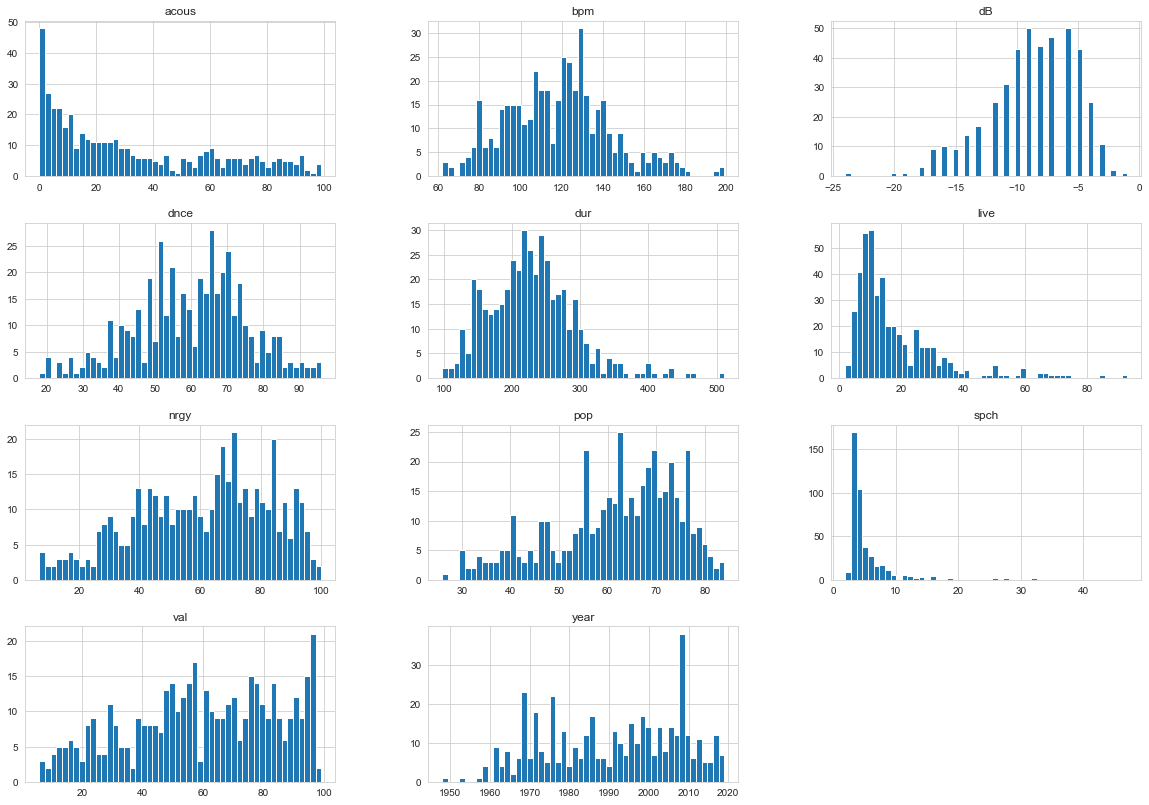

In [22]:
a = Train.hist(bins=50,figsize=(20, 14))
del a

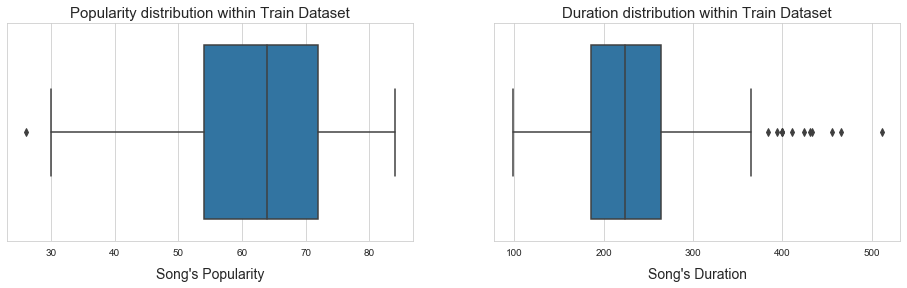

In [23]:
f, axes = plt.subplots(1,2, figsize=(16, 4), sharex=False)
ax = sb.boxplot(Train['pop'],ax=axes[0])
ax.set_xlabel("Song's Popularity", labelpad=10, fontsize=14)
ax.set_title('Popularity distribution within Train Dataset', fontsize=15)

ax = sb.boxplot(Train['dur'],ax=axes[1])
ax.set_xlabel("Song's Duration", labelpad=10, fontsize=14)
ax.set_title('Duration distribution within Train Dataset', fontsize=15)
del ax

In [24]:
print('Popularity mean:',Train['pop'].mean())
print('Popularity max value:',Train['pop'].max())
print('Popularity min value:',Train['pop'].min())

Popularity mean: 61.56064073226545
Popularity max value: 84
Popularity min value: 26


<h3>Distribution of the song's popularity over the years</h3>

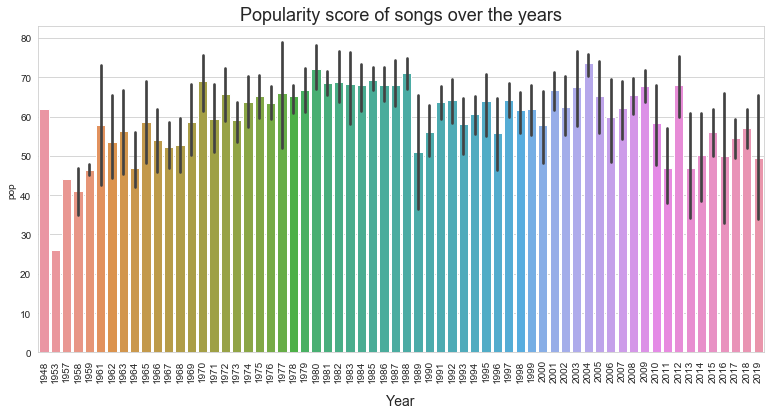

In [25]:
plt.figure(figsize=(13, 6))#Size of barplot figure
axes = sb.barplot(x="year", y="pop",data=Train)
axes.set_title('Popularity score of songs over the years',fontsize=18)#Barplot
axes.set_xlabel("Year", labelpad=12, fontsize=14)
plt.xticks(rotation =90 )
del axes

<h3>Data patterns visualization using scatterplots</h3>

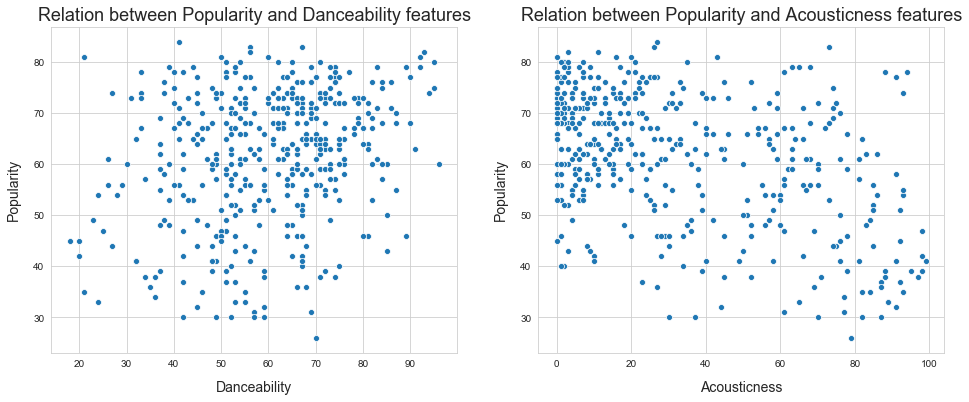

In [26]:
f, axes = plt.subplots(1,2, figsize=(16, 6), sharex=False)
ax =sb.scatterplot(Train['dnce'],Train['pop'],ax=axes[0])#checking for relationship between the
ax.set_title('Relation between Popularity and Danceability features',fontsize=18)#Barplot
ax.set_xlabel("Danceability", labelpad=12, fontsize=14)
ax.set_ylabel("Popularity", labelpad=12, fontsize=14)

ax =sb.scatterplot(Train['acous'],Train['pop'],ax=axes[1])#checking for relationship between the
ax.set_title('Relation between Popularity and Acousticness features',fontsize=18)#Barplot
ax.set_xlabel("Acousticness", labelpad=12, fontsize=14)
ax.set_ylabel("Popularity", labelpad=12, fontsize=14)

del ax


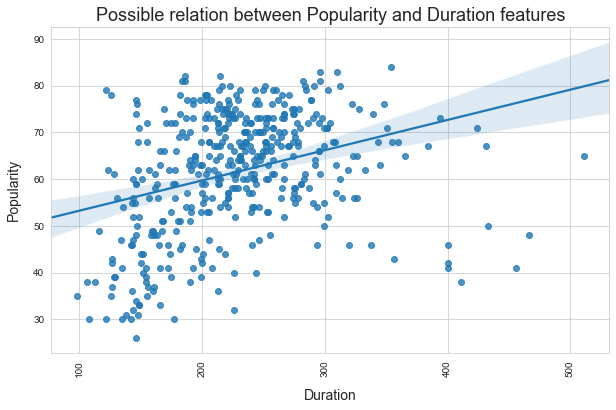

In [27]:
plt.figure(figsize=(10,6))
ax = sb.regplot(Train['dur'],Train['pop'])
ax.set_title('Possible relation between Popularity and Duration features',fontsize=18)#Barplot
ax.set_xlabel("Duration", labelpad=12, fontsize=14)
ax.set_ylabel("Popularity", labelpad=12, fontsize=14)
plt.xticks(rotation =90 )
del ax

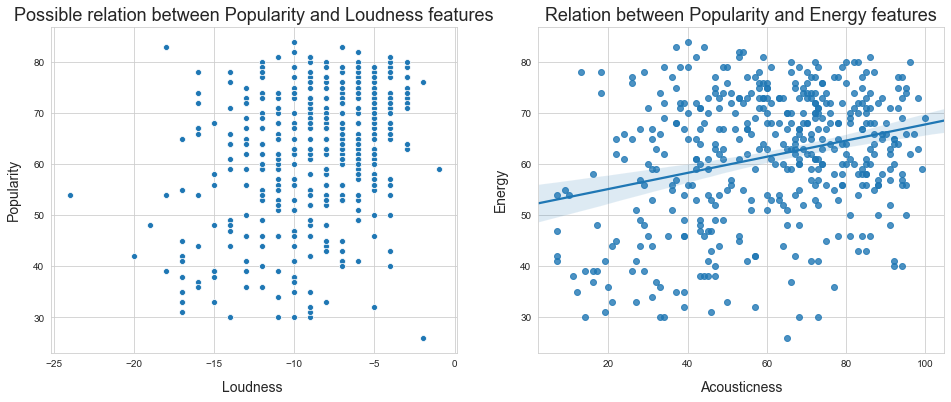

In [28]:
f, axes = plt.subplots(1,2, figsize=(16, 6), sharex=False)
ax = sb.scatterplot(Train['dB'],Train['pop'],ax=axes[0])
ax.set_title('Possible relation between Popularity and Loudness features',fontsize=18)#Barplot
ax.set_xlabel("Loudness ", labelpad=12, fontsize=14)
ax.set_ylabel("Popularity", labelpad=12, fontsize=14)

ax =sb.regplot(Train['nrgy'],Train['pop'],ax=axes[1])#checking for relationship between the
ax.set_title('Relation between Popularity and Energy features',fontsize=18)#Barplot
ax.set_xlabel("Acousticness", labelpad=12, fontsize=14)
ax.set_ylabel("Energy", labelpad=12, fontsize=14)


del ax



##### In this set of graph we can observe the existence of outliers, which produce that the seaborn regplot (linear regression) does not perform as well as it should.

<h3>Features Correlation analysis</h3>

In [29]:
plt.figure(figsize=(10,6))#correlation coefficient only measures linear correlations
Train.corr().round(2)

,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
year,1.00,-0.03,0.16,0.26,0.32,-0.01,-0.01,-0.00,-0.18,0.20,0.02
bpm,-0.03,1.00,0.22,-0.01,0.10,0.02,0.15,0.01,-0.21,0.04,0.04
nrgy,0.16,0.22,1.00,0.35,0.69,0.10,0.41,0.15,-0.66,0.20,0.27
dnce,0.26,-0.01,0.35,1.00,0.25,-0.09,0.47,0.11,-0.39,0.23,0.26
dB,0.32,0.10,0.69,0.25,1.00,0.08,0.15,0.09,-0.46,0.23,0.31
live,-0.01,0.02,0.10,-0.09,0.08,1.00,0.06,-0.09,-0.04,0.08,-0.03
val,-0.01,0.15,0.41,0.47,0.15,0.06,1.00,-0.16,-0.24,0.08,-0.04
dur,-0.00,0.01,0.15,0.11,0.09,-0.09,-0.16,1.00,-0.26,0.10,0.32
acous,-0.18,-0.21,-0.66,-0.39,-0.46,-0.04,-0.24,-0.26,1.00,-0.21,-0.44
spch,0.20,0.04,0.20,0.23,0.23,0.08,0.08,0.10,-0.21,1.00,0.13


<Figure size 720x432 with 0 Axes>

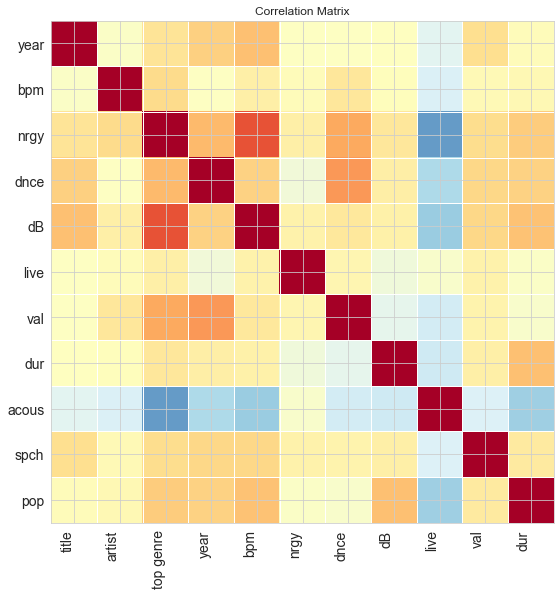

In [30]:
corr_matrix = Train.corr()#correlation coefficient only measures linear correlations
fig, ax = plt.subplots(figsize=(15, 8))
ax = smg.plot_corr(corr_matrix, xnames=Train.columns,ax=ax,normcolor=True)
plt.xticks(rotation =90 ,fontsize=14)
plt.yticks(fontsize=14)
plt.show()

In [31]:
corr_matrix['pop'].sort_values(ascending=False)#correlation coefficient only measures linear relationship

pop      1.000000
dur      0.321239
dB       0.312994
nrgy     0.273986
dnce     0.256051
spch     0.130365
bpm      0.042393
year     0.019295
live    -0.025611
val     -0.039966
acous   -0.444260
Name: pop, dtype: float64

<div style="text-align: justify">The correlation matrix shows the correlation coefficients, which is a measure of the strength and direction of the linear relationship between the variables.The first regression model that will be used for the prediction task is a simple Linear Regression model. The model is made of simple combinations of weighted features, and it expresses more bias than variance in its predictions. The linear model assumes that there is a linear relationship between the dependent variable("pop") and the independent variables (predictors). The correlation coefficients show a very weak relationship. Few columns like **['nrgy' 'dnce' 'dB' 'dur' 'acous']** shows sign of little linear relationship.</div>

In [32]:
data = Train.copy()# A copy of the Train dataset

<a href='#Index'>Back to index</a>

<h2>Data Preprocessing</h2>

<h3> Dealing with outliers</h3>

<div style="text-align: justify">Outliers (values outside the normal range) skew data distribution. It pushes the mean in different directions. Furthermore, it increases the variance and affects correlations. Outliers disrupt linear regression because the model tries to minimize the square value of errors (residuals). Outliers have large residuals, thus forcing the algorithm to focus more on them than on regular points. From the scatter plot and boxplot, one could notice the presence of outliers, which is often the case with most datasets. The boxplot and histogram show skewness. Skewness generally affects machine learning's algorithm predictive strength, especially when the response(dependent) variable("pop") is skewed. A Gaussian distribution is often ideal (the median and mean have the same values), which is seldom the case. A scatter plot gives a clearer picture of the data pattern, and it is also a handy tool when checking for correlations.</div>

In [33]:
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

year     30.0
bpm      33.0
nrgy     34.0
dnce     21.0
dB        5.0
live     14.0
val      38.0
dur      78.0
acous    50.0
spch      3.0
pop      18.0
dtype: float64


In [34]:
print((data < (Q1 - 1.5 * IQR)) |(data > (Q3 + 1.5 * IQR)))#True represent outlier

     acous  artist    bpm     dB   dnce    dur   live   nrgy    pop   spch  \
Id                                                                           
1    False   False  False  False  False  False  False  False  False  False   
3    False   False  False  False  False  False  False  False  False  False   
4    False   False  False  False  False  False  False  False  False  False   
5    False   False  False  False  False  False  False  False  False  False   
6    False   False  False  False  False  False  False  False  False  False   
..     ...     ...    ...    ...    ...    ...    ...    ...    ...    ...   
449  False   False  False  False   True  False  False  False  False  False   
450  False   False  False  False  False  False  False  False  False  False   
451  False   False  False  False  False  False  False  False  False   True   
452  False   False  False  False  False  False  False  False  False  False   
453  False   False  False  False  False  False  False  False  Fa

In [35]:
dataset = data[~((data < (Q1 - 1.5 * IQR)) |(data > (Q3 + 1.5 * IQR))).any(axis=1)]#Filtering out the outliers using Quartile
dataset.shape

(363, 14)

<div style="text-align: justify">The data points that lie within the lower quartile and minimum, and the upper quartile and the maximum, are deemed to be rare values (outliers) that can negatively affect our results.</div>

In [36]:
dataset.head()

,title,artist,top genre,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
Id,,,,,,,,,,,,,,
1,My Happiness,Connie Francis,adult standards,1996,107,31,45,-8,13,28,150,75,3,44
3,How Deep Is Your Love,Bee Gees,adult standards,1979,105,36,63,-9,13,67,245,11,3,77
4,Woman in Love,Barbra Streisand,adult standards,1980,170,28,47,-16,13,33,232,25,3,67
5,Goodbye Yellow Brick Road - Remastered 2014,Elton John,glam rock,1973,121,47,56,-8,15,40,193,45,3,63
6,Grenade,Bruno Mars,pop,2010,110,56,71,-7,12,23,223,15,6,74


Text(0.5, 1.0, "Song's Duration Distriburion over Train Dataset")

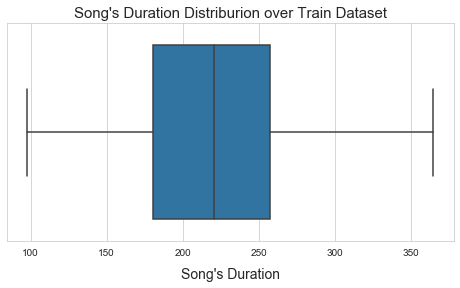

In [37]:
f, axes = plt.subplots(figsize=(8, 4), sharex=False)
ax = sb.boxplot(dataset['dur'])
ax.set_xlabel("Song's Duration", labelpad=10, fontsize=14)
ax.set_title("Song's Duration Distriburion over Train Dataset", fontsize=15)

In [38]:
cor_matrix = dataset.corr()
print('correlation matrix after removing outliers')
cor_matrix['pop'].sort_values(ascending=False)#Improved correlation coefficient

correlation matrix after removing outliers


pop      1.000000
dur      0.469309
dB       0.281700
nrgy     0.265849
dnce     0.228033
bpm      0.067384
spch     0.066017
val     -0.058693
year    -0.063259
live    -0.141586
acous   -0.419911
Name: pop, dtype: float64

<a href='#Index'>Back to index</a>

<a id='Implementation'></a>
<h1>Implementation</h1>

In [39]:
data_without_target = dataset.drop("pop", axis=1)#Predictors
data_labels = dataset["pop"].copy()#Target
numeric_col=data_without_target.drop(['top genre', 'artist','title'], axis=1)#without categorical columns and target
X_test_reg =  Test.copy()#Test dataset
X_test = X_test_reg.drop(['year',"bpm","spch","val","live",'top genre','artist','title'],axis=1)#test dataset
predictors = numeric_col.drop(['year',"bpm","spch","val","live"],axis=1)#Selected predictors train dataset
normalized_train=(predictors-predictors.min())/(predictors.max()- predictors.min())#Normalized Train dataset MinMax
normalized_test=(X_test-X_test.min())/(X_test.max()- X_test.min())#Normalized Test dataset

<div style="text-align: justify">Both the train and test dataset are now normalized. Values are between the range of 0 and 1. The calculation was done manually to preserve the data frame,it is equivalent to the MinMax Scaler provided by scikit-learn. Using MinMax won't be ideal if the dataset has outliers because the values are bounded within a specific range.</div>

<a id='Baseline'></a>
<h2>Baseline</h2>

<div style="text-align: justify">Before thinking about creating complex Machine Learning Models, we must establish a baseline which we want to overcome.

Usually this baseline is based on the performance of a simple/weak Machine Learning Model or a simple solution which allows us to compare the performance of more complex solutions.
For the regression task, the baseline could be any weak model such as linear Regression, decision tree regressor (with small depth).</div>

## Multiple linear regression

<div style="text-align: justify">Multiple linear regression model is an extended form of the traditional linear regression model. It can be represented mathematically by; $Y = b_0 + b_1X_1+ b_2X_2 +..+ b_kX_k + \Theta$ where Y(popularity score) is a function of predictor variables $X_1,X_2...$.The $b_0$ represents the intercept on the Y axis, $b_1$ through $b_k$ are the estimated regression coefficients and $\Theta$ refers to the residuals (random error term).A linear regression model is powerful when some key assumptions are met; the relationship between the independent and dependent variables are linear (linearity), no or little multicollinearity, and Homoscedasticity. We saw from the scatter plots that only a few variables showed a linear relationship; furthermore, the correlation matrix helped us to determine the strength of the linear relationship. So only the columns with high correlation coefficient will be used for our linear model. The second assumption of "no multicollinearity between the predictor variables was met. Homosscedasticity can be checked by first creating a partial model using the ols() function from the statsmodel python module, then plot the fitted response values vs the residuals. Doing this is not an option since our emphasis is not based only on the linear regression model.</div>

In [40]:
linear_reg = LinearRegression()
linear_reg.fit(normalized_train,data_labels)
pop_prediction = linear_reg.predict(normalized_test)
print('Baseline predictions :')
print(pop_prediction)

Baseline predictions :
[63.45212778 60.68832676 55.4408493  60.27154306 55.69868301 62.78934591
 56.3985495  46.48044416 61.54437661 60.93146193 50.61323572 66.75752593
 52.27024606 60.1392578  66.11873068 64.87681362 55.5101136  61.03638881
 62.47071627 63.46203862 56.50532166 54.26264662 51.55202842 49.71801134
 50.4281271  64.21966546 61.83036504 57.22244649 50.22522862 65.78993304
 65.19321838 52.90579964 63.48242058 66.36243291 64.35032374 68.09211197
 63.63469795 49.70268532 58.58148096 67.39025171 63.48024775 70.70811103
 63.35311305 52.76916913 60.36294919 57.44807496 61.37574332 65.14239544
 55.46917162 63.38532541 54.77780965 67.59520952 58.94335202 47.88240832
 54.87490504 53.94545272 68.77876809 52.45722236 67.03623604 48.25833214
 65.7477469  60.97312831 62.1172803  65.29835254 63.18777821 61.67016466
 71.74195488 48.88244668 61.28317403 67.65168259 64.14248418 49.06972575
 53.05864494 61.01810792 51.50037674 69.15373379 65.88263132 61.48522338
 60.06309406 52.73651793 61.

### Baseline Validation

In [41]:
kfold = KFold(10)
result = cross_val_score(linear_reg,normalized_train,data_labels, cv = kfold, scoring = "neg_mean_squared_error",n_jobs=-1)
linear_reg_rmse = np.sqrt(-result)
result = cross_val_score(linear_reg,normalized_train,data_labels, cv = kfold, scoring = "r2")
print('Baseline model performance:')
print(f'RMSE: {linear_reg_rmse.mean().round(2)}, R2 score:{result.mean().round(2)}, SD: {linear_reg_rmse.std().round(2)}, Kfolds:{len(result)}.')

Baseline model performance:
RMSE: 10.63, R2 score:0.26, SD: 1.25, Kfolds:10.


In [42]:
pred_file = pd.DataFrame({"Id":Test.index.values, "pop":pop_prediction})
pred_file=pred_file.set_index('Id')
pred_file.to_csv('BaseLine.csv')
print('Kaggle RMSE Score: 9.68361')

Kaggle RMSE Score: 9.68361


<a href='#Index'>Back to index</a>

<a id='Ensambled'></a>
<h2>Final  Model Preprocessing</h2>

In [43]:
class DataFrameSelector(BaseEstimator, TransformerMixin):# for selecting desired attributes
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names].values#returns NumPy array

In [44]:
num_attribs= list(numeric_col)#list of numeric attributes for the numeric columns pipeline

In [45]:
cat_attribs = ['top genre', 'artist']#list of categorical attributes for the categorical columns pipeline

In [46]:
attributes = num_attribs + cat_attribs

In [47]:
num_pipeline = Pipeline([ #pipeline for numerical columns with MinMax scaler
    ('selector', DataFrameSelector(num_attribs)),
    ('MinMax_scaler', MinMaxScaler())])

In [48]:
cat_pipeline = Pipeline([                   #pipeline for categorical columns with OneHotEncoding
 ('selector', DataFrameSelector(cat_attribs)),
('One_Hot',  OneHotEncoder(sparse=False,handle_unknown = 'ignore'))])

In [49]:
full_pipeline = FeatureUnion(transformer_list=[("num_pipeline", num_pipeline),#full pipeline
                                               ("cat_pipeline", cat_pipeline),])

In [50]:
prepared_data = full_pipeline.fit_transform(data_without_target)#Transform the predictors

In [51]:
prepared_data.shape#new shape of predictors

(363, 364)

In [52]:
X_test2 = Test.copy()

In [53]:
X_test_prepared = full_pipeline.transform(X_test2)#Transformed Test dataset
X_test_prepared.shape

(114, 364)

<a id='Ensambled'></a>
<h2>Final  Model</h2>

### Switching to more sophisticated models.

<div style="text-align: justify">Since our linear model has a high level of bias because of our assumptions that the criteria for them to perform well are met, we can improve their predictive power by adding more features, thus increasing the variance of their estimates.</div>

### Variance/Bias Trade-off:

<div style="text-align: justify">While a high level of Bias leads to underfitting, increasing the variance by adding more features leads to overfitting.
So the next model we will use is a variant of the usual Linear regression model called the Lasso Regression (L1 Regularization). Lasso uses regularization as a form of control over the Variance/Bias trade-off. Lasso performs variable selection and shrinks less useful coefficients to zero. Grid search is used to get the best hyperparameters.</div>

#### Lasso Linear Regression

In [54]:
lasso_params = {'alpha':np.logspace(-2,3,8)}
lasso_grid_search = GridSearchCV(Lasso(), param_grid=lasso_params,cv=10,scoring='neg_mean_squared_error',refit =True,verbose=1,n_jobs=-1)
lasso_grid_search.fit(prepared_data, data_labels)
lasso = Lasso(**lasso_grid_search.best_params_)
lasso.fit(prepared_data, data_labels)
pop_prediction_l = lasso.predict(X_test_prepared)

Fitting 10 folds for each of 8 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:    0.1s finished


#### KneighborsRegressor

In [55]:
KNR_params ={'n_neighbors':np.arange(2,20,2),'weights':['uniform','distance'],'metric':['euclidean','manhattan']}
knr_grid_search2 = GridSearchCV(KNeighborsRegressor(), param_grid=KNR_params,cv=11,scoring='neg_mean_squared_error',refit =True,verbose=1)
knr_grid_search2.fit(prepared_data, data_labels)
knr = KNeighborsRegressor(**knr_grid_search2.best_params_)
knr.fit(prepared_data, data_labels)
pop_prediction_k = knr.predict(X_test_prepared)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 11 folds for each of 36 candidates, totalling 396 fits


[Parallel(n_jobs=1)]: Done 396 out of 396 | elapsed:    6.8s finished


#### Random Forest Regressor

In [56]:
RFR_params = {'n_estimators': [300], 'max_features': [6, 8],'bootstrap': [True], 'max_depth': np.append(np.arange(3,30) , [None])}
rfr_grid_search3 = GridSearchCV(RandomForestRegressor(), param_grid=RFR_params,cv=10,scoring='neg_mean_squared_error',refit =True,verbose=1)
rfr_grid_search3.fit(prepared_data, data_labels)
feature_importances = rfr_grid_search3.best_estimator_.feature_importances_
print(sorted(zip(feature_importances, attributes), reverse=True))
print("tuned hpyerparameters :(best parameters) ",rfr_grid_search3.best_params_)
rfr = RandomForestRegressor(**rfr_grid_search3.best_params_)
rfr.fit(prepared_data, data_labels)
pop_prediction_r = rfr.predict(X_test_prepared)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 10 folds for each of 56 candidates, totalling 560 fits


[Parallel(n_jobs=1)]: Done 560 out of 560 | elapsed:  2.0min finished


[(0.10849889489890392, 'dur'), (0.07076517962749751, 'acous'), (0.06762719960715677, 'year'), (0.06292693783110186, 'nrgy'), (0.05034854959089518, 'dnce'), (0.04845451562819616, 'dB'), (0.04655409969474325, 'bpm'), (0.04376771971954495, 'val'), (0.042570852158618326, 'live'), (0.024710647995521504, 'spch'), (0.017122894991524328, 'artist'), (0.00038320519381864474, 'top genre')]
tuned hpyerparameters :(best parameters)  {'bootstrap': True, 'max_depth': None, 'max_features': 6, 'n_estimators': 300}


#### Support Vector Regressor Kernel trick

In [57]:
SVR_params = [{'kernel': ['linear'],'C':np.logspace(-3,2,6),'epsilon':[0.1,0.2,0.5,1,2]},
 {'kernel':['rbf'],'C':np.logspace(-3,2,6),'gamma': np.logspace(-3,2,6),'epsilon':[0.1,0.2,0.5,1,2]}]

SVR_grid_search4 = GridSearchCV(SVR(), param_grid=SVR_params,cv=10,scoring='neg_mean_squared_error',refit =True,verbose=1,n_jobs=-1)
SVR_grid_search4.fit(prepared_data, data_labels)
svr=SVR(**SVR_grid_search4.best_params_)
svr.fit(prepared_data, data_labels)
predict_svr = svr.predict(X_test_prepared)
    

Fitting 10 folds for each of 210 candidates, totalling 2100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 352 tasks      | elapsed:    5.0s
[Parallel(n_jobs=-1)]: Done 852 tasks      | elapsed:   11.4s
[Parallel(n_jobs=-1)]: Done 1552 tasks      | elapsed:   20.7s
[Parallel(n_jobs=-1)]: Done 2100 out of 2100 | elapsed:   27.8s finished


### Ensemble Voting models

In [58]:
myVote = VotingRegressor([('lasso', lasso), ('KNR', knr), ('RF', rfr), ('SVR', svr)])
last_predict=myVote.fit(prepared_data, data_labels).predict(X_test_prepared)

### Ensemble Stacking model | Linear regressor as the meta estimator

In [59]:
estimators = [('lasso', lasso), ('KNR', knr),('SVR', svr),('rad',rfr)]
reg = StackingRegressor(estimators=estimators,final_estimator=linear_reg,cv=10)  
reg_final= reg.fit(prepared_data, data_labels).predict(X_test_prepared)

<div style="text-align: justify">The KNN regressor uses feature similarity to make its predictions. It works out the neighbours of observation using a distance measure (e.g. Euclidean or Manhattan). It is a good option since the variance in our dataset is proportionate (no outliers). The Random forest regressor(ensemble model) is just a bunch of decision tree regressors (it's base learner). Unlike in linear regression, this model doesn't require linearity, and it makes feature selection automatically. It uses the mean prediction of each tree. The Voting Regressor(ensemble model) and Stacking regressor(ensemble model) relies on other regressors to make their predictions. The SVR supports non-linear regression.</div>

<a href='#Index'>Back to index</a>

<a id='EnsVal'></a>
<h2>Final Model Validation</h2>

### Function created to perform cross validations

In [60]:
def Custom_cross_validation(Number_of_Folds,X,Y,Score,Model):
    model = clone(Model)
    kFolds=KFold(Number_of_Folds)
    Y2=Y.values
    kFolds.get_n_splits(X,Y2)
    score=0
    
    for train_index, test_index in kFolds.split(X,Y2):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = Y2[train_index], Y2[test_index]
        model.fit(X_train,y_train)
        pred = model.predict(X_test)
        if Score == 'mean_squared_error':
            score = score + mean_squared_error(y_test,pred)
        elif Score == 'mean_absolute_error':
            score = score + mean_absolute_error(y_test,pred)
        elif Score == 'r2_score':
            score = score + r2_score(y_test,pred)
        elif Score == 'root_mean_squared_error':
            score = score + np.sqrt(mean_squared_error(y_test,np.absolute(pred)))
    score = score/Number_of_Folds
    return score

### Function created to perform cross validations fo multiples Models

In [61]:
def CrossValidation_to_dataframe(list_of_model,list_of_model_names,X,Y,Number_of_Folds):
    scores_name=['mean_squared_error','mean_absolute_error','r2_score','root_mean_squared_error']
    df = pd.DataFrame(columns=['Model','mean_squared_error','mean_absolute_error','r2_score','root_mean_squared_error'])
    for i in range(len(list_of_model)):
        scores=[list_of_model_names[i]]
        for j in scores_name:
            score_aux=0
            score_aux =Custom_cross_validation(Number_of_Folds,X,Y,j,list_of_model[i])
            scores.append(score_aux)
        df.loc[len(df)] = scores
    df.set_index('Model',inplace=True)
    return df

In [62]:
CrossValidation_to_dataframe([lasso,knr,rfr,svr,myVote,reg],['Lasso Regression','KNeighborsRegressor','RandomForestRegressor','Support Vector Machine - Regression','VotingRegressor','StackingRegressor'],prepared_data, data_labels,10)

,mean_squared_error,mean_absolute_error,r2_score,root_mean_squared_error
Model,,,,
Lasso Regression,104.438430,8.208774,0.324963,10.146070
KNeighborsRegressor,96.582253,7.889515,0.375834,9.754047
RandomForestRegressor,101.497259,8.180818,0.351149,10.026671
Support Vector Machine - Regression,101.949776,8.145974,0.333487,10.042610
VotingRegressor,95.199045,7.874304,0.386233,9.709873
StackingRegressor,95.338850,7.795153,0.377762,9.719725


<a href='#Index'>Back to index</a>

<a id='Prediction'></a>
<h1>Model Predictions</h1>

In [68]:
pred_file = pd.DataFrame({"Id":Test.index.values, "pop":pop_prediction_k})
pred_file=pred_file.set_index('Id')
pred_file.to_csv('groupM.csv')
print('Final Predictions: ', pop_prediction_k)

Final Predictions:  [69.14248302 70.54029681 69.05660822 63.31876029 53.74814133 60.96993172
 61.84937766 50.79203084 67.22174075 65.00054501 41.91800343 69.88381448
 54.43518636 62.07445153 63.09952239 64.81488314 71.37725176 64.10252694
 68.68064359 69.98296725 64.03169206 53.33168617 72.         53.57992482
 49.58834238 70.74081826 63.5836971  55.45156539 42.32375795 71.17410607
 71.06540145 52.02597703 69.40962216 71.13185235 59.67925783 72.90221583
 69.16911092 56.26880939 62.59815769 66.56061625 66.62501449 64.88446035
 65.71766685 42.75682553 69.78206312 43.68434205 68.85146113 68.1914692
 56.25016218 67.6663647  52.10710137 71.00470322 69.39957514 53.09909908
 63.12033382 62.19580987 68.36971316 54.52311574 71.04844291 55.37230516
 60.91132963 67.         66.07107834 61.21055053 70.2292782  65.18055979
 69.71022969 56.95896586 65.31474229 63.43360939 68.96168587 46.78501691
 58.19378591 65.44251185 60.54813772 70.27188723 65.02560412 65.03710666
 72.16029976 54.27187499 66.1830

<a id='Conclusion'></a>
<h1>Reflections and Conclusion</h1>

<div style="text-align: justify">The correlation analysis showed a weak linear relationship between the response and predictor variables; therefore, linear regression was the worst in terms of performance. Furthermore, the linear model can not grasp a non-linear relationship. The lasso regression improved by some margins when compared to its linear counterpart. The KNN regressor performed beyond expectation. The Random forest regressor and SVR have similar results. The stacked regressor results are influenced not only by choice of the base learners but by the meta learner. The voting regressor just returns the average predictions of other regressors. The predictions made by the KNN regressor gave a score of 7.07 in Kaggle which is similar to the evaluation score from the cross-validation, also the Stacking regressor gave a score of 7.1 in Kaggle.
</div>

<a href='#Index'>Back to index</a>

<a id='PromModel'></a>
<h1>Promising Models And Techniques Which Failed</h1>

        

Many techniques, models and configurations were generated in order to achieve a better performance. Among these were some that we strongly considered that they could have helped with the task, but in the end this was not the case.

<a id='Adaboosting'></a>
## Adaboosting and Voting

<div style="text-align: justify">1) To reduce the bias of our models, we try to add differents adaptive boosting models configured with different base estimators and hyper-parameters. One approach was including each of them in the final ensemble model but it drastically failed. We thought about creating two adaptive boosting models with the same base estimator but with different hyper-parameters (one selected to obtain the lowest RMSE and the other selected to obtain the lowest MAE). 
Although the last approach should have produced a positive impact on our final model, the RMSE score over the cross-validation increased by 0.5.</div>

In [64]:
#ModelXbagginDTR80T = BaggingRegressor(DecisionTreeRegressor(max_depth=80),bootstrap=True, n_estimators=400)
#ModelXbagginDTR80F = BaggingRegressor(DecisionTreeRegressor(max_depth=80),bootstrap=False, n_estimators=400)
#ModelXbagginDTR1T = BaggingRegressor(DecisionTreeRegressor(),bootstrap=True, n_estimators=400)
#ModelXbagginDTR1F = BaggingRegressor(DecisionTreeRegressor(),bootstrap=False, n_estimators=400)

#kfold = KFold(5)
#scores80T = cross_validate(ModelXbagginDTR80T,ScaledX,Y, cv=kfold,scoring='neg_mean_squared_error')
#print('MSE bagginknr80T: ',np.sqrt(-scores80T['test_score']).mean())
#scores80F = cross_validate(ModelXbagginDTR80F,ScaledX,Y, cv=kfold,scoring='neg_mean_squared_error')
#print('MSE bagginknr80F: ',np.sqrt(-scores80F['test_score']).mean())
#scores1T = cross_validate(ModelXbagginDTR1T,ScaledX,Y, cv=kfold,scoring='neg_mean_squared_error')
#print('MSE bagginknr1T: ',np.sqrt(-scores1T['test_score']).mean())
#scores1F = cross_validate(ModelXbagginDTR1F,ScaledX,Y, cv=kfold,scoring='neg_mean_squared_error')
#print('MSE bagginknr1F: ',np.sqrt(-scores1F['test_score']).mean())
##
#DTBagginVoterBT = VotingRegressor(estimators=[('b1',ModelXbagginDTR1T),('b2', ModelXbagginDTR80T)],
#                    weights=[(-1/(-scores1T['test_score']).mean()),(-1/(-scores80T['test_score']).mean())])#
#
#DTBagginVoterBF = VotingRegressor(estimators=[('b1', ModelXbagginDTR1F),('b2', ModelXbagginDTR80F)],
#                    weights=[(-1/(-scores1F['test_score']).mean()),(-1/(-scores80F['test_score']).mean())])##

#DTBagginVoterBT.fit(ScaledX,Y)
#DTBagginVoter_pred_BT = DTBagginVoterBT.predict(ScaledX_T)
#DTBagginVoterBF.fit(ScaledX,Y)
#DTBagginVoter_pred_BF = DTBagginVoterBF.predict(ScaledX_T)

<a href='#Index'>Back to index</a>

<a id='AdaboostingBaggingModel'></a>
## Adaboosting Bagging Model

<div style="text-align: justify">2)This model is based on the idea that the combination of the boosting technique with the bagging technique could produce a strong ensemble model which contains a lower bias, variance and with better performance</div>
 

In [65]:
#AdaBoostWeakDTR = AdaBoostRegressor(base_estimator =  BaggingRegressor(DecisionTreeRegressor(max_depth=80),bootstrap=True, n_estimators=400), n_estimators=1000,loss='exponential',learning_rate=1)
#AdaBoostWeakDTR.fit(ScaledX,Y)
#AdaBoostWeakDTR_pred = AdaBoostWeakDTR.predict(ScaledX_T)

<a href='#Index'>Back to index</a>